In [412]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

#to display all rows columns 
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)


In [413]:
ipl_df = pd.read_csv('../cric_stats/IPL_ball_by_ball_updated.csv')


In [414]:
ipl_df = ipl_df[(ipl_df.innings == 1) | (ipl_df.innings == 2)]


In [415]:
ipl_df['total_runs'] = ipl_df.apply(lambda x: x['runs_off_bat'] + x['extras'], axis = 1)


In [416]:
ipl_df['isOut'] = ipl_df['player_dismissed'].apply(lambda x: 1 if type(x) == type('str') else 0)


In [417]:
ipl_df[ipl_df.batting_team == 'Punjab Kings'].total_runs.value_counts()


1    743
0    576
4    155
2    104
6    93 
5    3  
3    2  
Name: total_runs, dtype: int64

In [418]:
ipl_df[ipl_df.batting_team == 'Delhi Capitals'].total_runs.value_counts()


1    2623
0    1932
4    712 
2    392 
6    241 
3    15  
5    6   
7    1   
Name: total_runs, dtype: int64

In [419]:
t1 = 'Royal Challengers Bangalore'
t2 = 'Mumbai Indians'

In [420]:
ipl_df[(ipl_df.batting_team == t1) & (ipl_df.bowling_team == t2) & (ipl_df.innings == 1)].match_id.unique()


array([ 336012,  501205,  501270,  548367,  597999,  829795,  980927,
        980981, 1082602, 1082628, 1136591, 1178406, 1216547, 1216499,
       1254108])

In [421]:
required_match_id = 1254108

In [422]:
ipl_df[ipl_df.match_id == required_match_id].head(1)


,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,total_runs,isOut
202666,1254108,2021,2021-09-26,Dubai International Cricket Stadium,2,14.3,Mumbai Indians,Royal Challengers Bangalore,HH Pandya,KA Pollard,Mohammed Siraj,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0


In [423]:
t1_outs = ipl_df[ipl_df.batting_team == t1].isOut.sum()
t2_outs = ipl_df[ipl_df.batting_team == t2].isOut.sum()

In [424]:
t1_outcomes = ipl_df[ipl_df.batting_team == t1].total_runs.value_counts()
t2_outcomes = ipl_df[ipl_df.batting_team == t2].total_runs.value_counts()


In [425]:
outcomes = [0, 1, 2, 3, 4, 6, 'w']


In [426]:
t1_outcomes_count = []
for outcome in outcomes:
    try:
        if outcome != 'w':
            t1_outcomes_count.append(t1_outcomes[outcome])
        else:
            t1_outcomes_count.append(t1_outs)
    except:
        t1_outcomes_count.append(0)
        

t2_outcomes_count = []
for outcome in outcomes:
    try:
        if outcome != 'w':
            t2_outcomes_count.append(t2_outcomes[outcome])
        else:
            t2_outcomes_count.append(t2_outs)
    except:
        t2_outcomes_count.append(0)


In [427]:
t1_pb = [i/sum(t1_outcomes_count) for i in t1_outcomes_count]
t2_pb = [i/sum(t2_outcomes_count) for i in t2_outcomes_count]


In [428]:
t1_cum_pb = list(np.cumsum(t1_pb))
t2_cum_pb = list(np.cumsum(t2_pb))


In [429]:
def innings_1_runs(curr_overs, curr_score, curr_wickets):
    i1p_0 = t1_cum_pb[0]
    i1p_1 = t1_cum_pb[1]
    i1p_2 = t1_cum_pb[2]
    i1p_3 = t1_cum_pb[3]
    i1p_4 = t1_cum_pb[4]
    i1p_6 = t1_cum_pb[5]
    i1p_w = 1

    # initialize runs, wickets
    pred_runs = curr_score
    pred_wks = curr_wickets
    
    # calculate leftover balls
    over_ball = curr_overs
    over_number = int(str(over_ball).split('.')[0])
    ball_number = int(str(over_ball).split('.')[1])
    
    if ball_number >= 6:
        ball_number = 6
    current_balls = over_number*6 + ball_number 
    leftover_balls = 120 - current_balls

    for i in range(leftover_balls):
    
        r_value = np.random.random()

        if r_value <= i1p_0:
            pred_runs += 0
        elif r_value <= i1p_1:
            pred_runs += 1
        elif r_value <= i1p_2:
            pred_runs += 2
        elif r_value <= i1p_3:
            pred_runs += 3
        elif r_value <= i1p_4:
            pred_runs += 4
        elif r_value <= i1p_6:
            pred_runs += 6
        else:
            pred_runs += 0
            pred_wks += 1
            if pred_wks == 10:
                break

    return pred_runs


In [430]:
# second innings
def innings_2_runs(curr_overs, curr_score, curr_wickets, target):
    i2p_0 = t2_cum_pb[0]
    i2p_1 = t2_cum_pb[1]
    i2p_2 = t2_cum_pb[2]
    i2p_3 = t2_cum_pb[3]
    i2p_4 = t2_cum_pb[4]
    i2p_6 = t2_cum_pb[5]
    i2p_w = 1

    # initialize runs, wickets
    pred_runs = curr_score
    pred_wks = curr_wickets
    
    # calculate leftover balls
    over_ball = curr_overs
    over_number = int(str(over_ball).split('.')[0])
    ball_number = int(str(over_ball).split('.')[1])
    
    if ball_number >= 6:
        ball_number = 6
    current_balls = over_number*6 + ball_number 
    leftover_balls = 120 - current_balls

    for i in range(leftover_balls):
    
        r_value = np.random.random()

        if r_value <= i2p_0:
            pred_runs += 0
        elif r_value <= i2p_1:
            pred_runs += 1
        elif r_value <= i2p_2:
            pred_runs += 2
        elif r_value <= i2p_3:
            pred_runs += 3
        elif r_value <= i2p_4:
            pred_runs += 4
        elif r_value <= i2p_6:
            pred_runs += 6
        else:
            pred_runs += 0
            pred_wks += 1
            if pred_wks == 10:
                break
        
        if pred_runs > target:
            break

    return pred_runs

In [431]:
mdf = ipl_df[ipl_df.match_id == required_match_id]


In [432]:
mdf.reset_index(inplace = True, drop = True)


In [433]:
df_ing1 = mdf[mdf.innings == 1]
df_ing2 = mdf[mdf.innings == 2]

In [434]:
df_ing1 = df_ing1.sort_values('ball', ascending = True)
df_ing2 = df_ing2.sort_values('ball', ascending = True)


In [435]:
df_ing1.reset_index(inplace = True, drop = True)
df_ing2.reset_index(inplace = True, drop = True)

In [436]:
curr_score = 0
curr_wickets = 0
curr_overs = 0.0

ing1_runs_pred = []

for i in range(len(df_ing1)):
    curr_score += df_ing1.total_runs[i]
    curr_overs = df_ing1.ball[i]
    curr_wickets += df_ing1.isOut[i]    
    prediction = innings_1_runs(curr_overs, curr_score, curr_wickets)
#     print('score: ', curr_score, ' overs: ', curr_overs, ' wickets: ', curr_wickets, ' prediction: ', prediction)
    ing1_runs_pred.append(prediction)

In [437]:
ing1_actual_score = sum(df_ing1.total_runs)


In [438]:
curr_score = 0
curr_wickets = 0
curr_overs = 0.0
target = ing1_actual_score

ing2_runs_pred = []

for i in range(len(df_ing2)):
    curr_score += df_ing2.total_runs[i]
    curr_overs = df_ing2.ball[i]
    curr_wickets += df_ing2.isOut[i]
    
    prediction = innings_2_runs(curr_overs, curr_score, curr_wickets, target)
#     print('target: ', target)
#     print('score: ', curr_score, ' overs: ', curr_overs, ' wickets: ', curr_wickets, ' prediction: ', prediction)
    ing2_runs_pred.append(prediction)


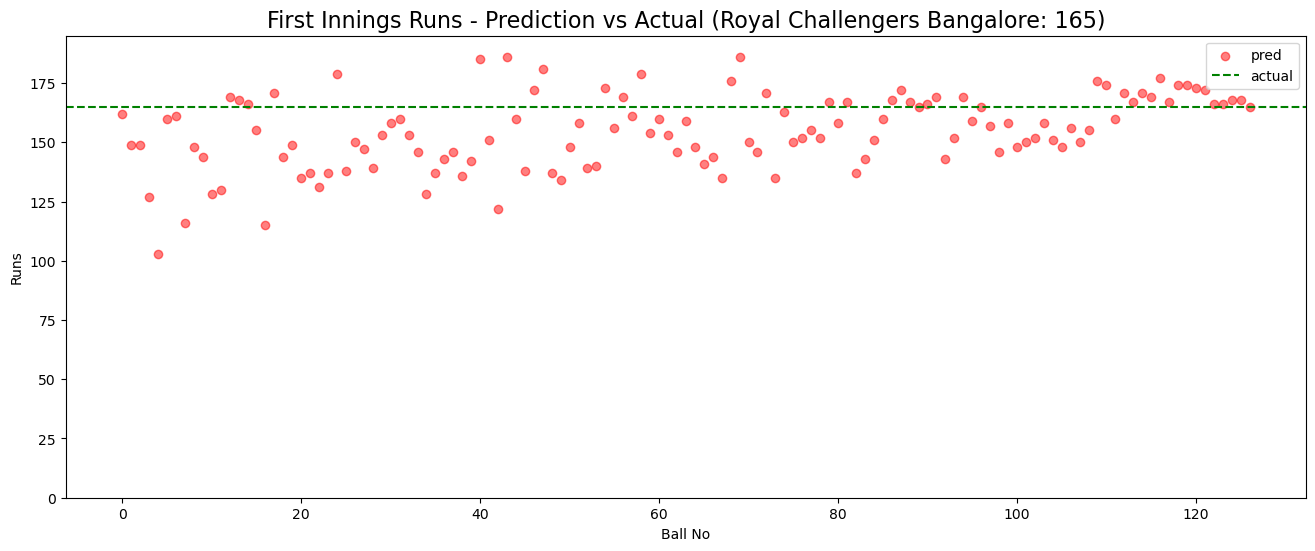

In [439]:
plt.figure(figsize = (16, 6))
plt.scatter([i for i in range(len(ing1_runs_pred))], ing1_runs_pred, alpha = 0.5, label = 'pred', color = 'red')
plt.ylim(0, ing1_actual_score + 30)
plt.axhline(ing1_actual_score, ls = '--', label = 'actual', color = 'green')
plt.title('First Innings Runs - Prediction vs Actual (' + t1 + ': ' + str(ing1_actual_score) +  ')', fontsize = 16)
plt.legend()
plt.xlabel('Ball No')
plt.ylabel('Runs')
plt.show()


In [440]:
import plotly.graph_objs as go

fig = go.Figure()

# Add predicted runs as a scatter plot
fig.add_trace(
    go.Scatter(x=list(range(len(ing1_runs_pred))), y=ing1_runs_pred, mode='markers', 
                marker=dict(color='red', opacity=0.5), name='pred')
)

# Add a horizontal line at the actual score
fig.add_shape(type='line', x0=0, x1=len(ing1_runs_pred), y0=ing1_actual_score, y1=ing1_actual_score,
              line=dict(dash='dash', color='green'), name='actual')

# Set the layout of the plot
fig.update_layout(
    title='First Innings Runs - Prediction vs Actual (' + t1 + ': ' + str(ing1_actual_score) +  ')',
    xaxis_title='Ball No',
    yaxis_title='Runs',
    yaxis_range=[0, ing1_actual_score + 40],
    legend=dict(x=0, y=1),
    width=900,
    height=400
)

fig.show()


In [441]:
np.mean([abs(i - ing1_actual_score) for i in ing1_runs_pred])


14.67716535433071

In [442]:
ing1_actual_score = sum(df_ing1.total_runs)


In [443]:
ing2_actual_score = sum(df_ing2.total_runs)
ing2_wkts = sum(df_ing2.isOut)


In [444]:
df_ing2.head(8)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,total_runs,isOut
0,1254108,2021,2021-09-26,Dubai International Cricket Stadium,2,0.1,Mumbai Indians,Royal Challengers Bangalore,RG Sharma,Q de Kock,KA Jamieson,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
1,1254108,2021,2021-09-26,Dubai International Cricket Stadium,2,0.2,Mumbai Indians,Royal Challengers Bangalore,Q de Kock,RG Sharma,KA Jamieson,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2,1254108,2021,2021-09-26,Dubai International Cricket Stadium,2,0.3,Mumbai Indians,Royal Challengers Bangalore,Q de Kock,RG Sharma,KA Jamieson,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,0
3,1254108,2021,2021-09-26,Dubai International Cricket Stadium,2,0.4,Mumbai Indians,Royal Challengers Bangalore,Q de Kock,RG Sharma,KA Jamieson,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
4,1254108,2021,2021-09-26,Dubai International Cricket Stadium,2,0.5,Mumbai Indians,Royal Challengers Bangalore,Q de Kock,RG Sharma,KA Jamieson,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
5,1254108,2021,2021-09-26,Dubai International Cricket Stadium,2,0.6,Mumbai Indians,Royal Challengers Bangalore,RG Sharma,Q de Kock,KA Jamieson,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
6,1254108,2021,2021-09-26,Dubai International Cricket Stadium,2,1.1,Mumbai Indians,Royal Challengers Bangalore,RG Sharma,Q de Kock,Mohammed Siraj,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
7,1254108,2021,2021-09-26,Dubai International Cricket Stadium,2,1.2,Mumbai Indians,Royal Challengers Bangalore,RG Sharma,Q de Kock,Mohammed Siraj,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0


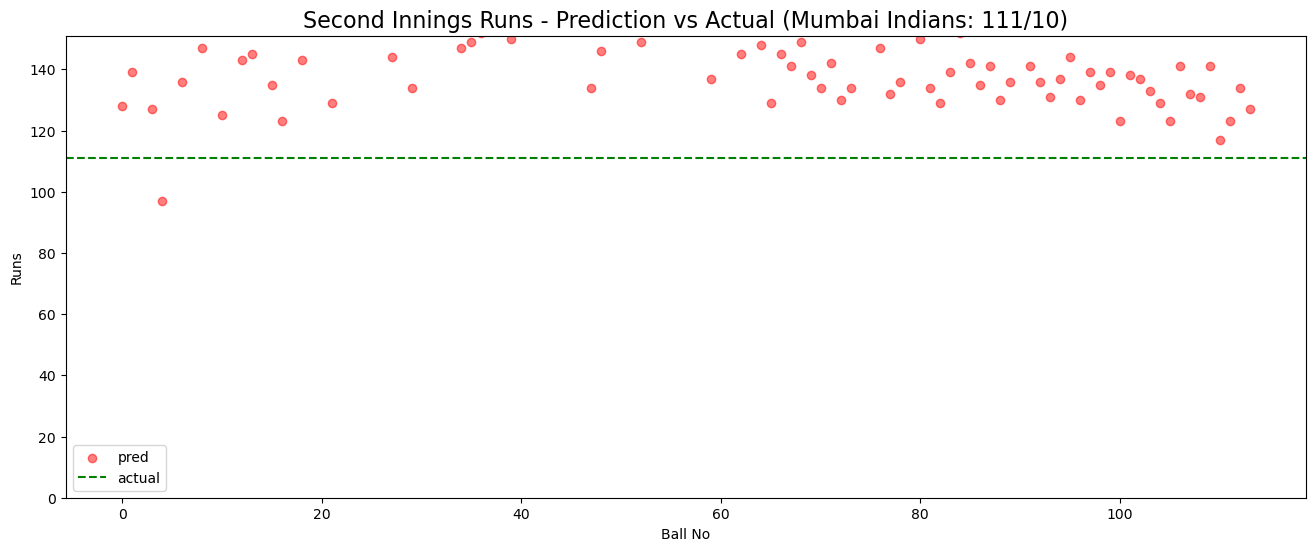

In [445]:
plt.figure(figsize = (16, 6))
plt.scatter([i for i in range(len(ing2_runs_pred))], ing2_runs_pred, alpha = 0.5, label = 'pred', color = 'red')
plt.ylim(0, ing2_actual_score + 40)
plt.axhline(ing2_actual_score, ls = '--', label = 'actual', color = 'green')
plt.title('Second Innings Runs - Prediction vs Actual (' + t2 + ': ' + str(ing2_actual_score) + '/'+ str(ing2_wkts)+  ')', fontsize = 16)
plt.xlabel('Ball No')
plt.ylabel('Runs')
plt.legend()
plt.show()

In [446]:
np.mean([abs(i - ing2_actual_score) for i in ing2_runs_pred])


35.64035087719298

In [447]:
win_count = 0
tie_count = 0
lose_count = 0

win_count_ls = []
tie_count_ls = []
lose_count_ls = []

ing1_curr_score = 0
ing1_curr_overs = 0
ing1_curr_wickets = 0

# each ball
for i in range(len(df_ing1)):
    
    # 1st innings values
    ing1_curr_score += df_ing1.total_runs[i]
    ing1_curr_overs = df_ing1.ball[i]
    ing1_curr_wickets += df_ing1.isOut[i]
    
    #2nd innings values
    ing2_curr_score = 0
    ing2_curr_wickets = 0
    ing2_curr_overs = 0.0
    
    # make a prediction for 100 times & get win/lose/tie count(ex: 28% win)
    for j in range(100):
        
        ing1_prediction = innings_1_runs(ing1_curr_overs, ing1_curr_score, ing1_curr_wickets)
        target = ing1_prediction
        
        ing2_prediction = innings_2_runs(ing2_curr_overs, ing2_curr_score, ing2_curr_wickets, target)
        
#         print(ing1_prediction, ing2_prediction)
        
        # prediction w.r.t 2nd team
        if ing2_prediction > target:
            win_count += 1
        elif ing2_prediction == target:
            tie_count += 1
        else:
            lose_count += 1
            
    win_count_ls.append(win_count)
    tie_count_ls.append(tie_count)
    lose_count_ls.append(lose_count)
    
    win_count = 0
    tie_count = 0
    lose_count = 0


In [448]:
ing2_curr_score = 0
ing2_curr_wickets = 0
ing2_curr_overs = 0.0

for i in range(len(df_ing2)):
    
    # 1st innings values
    target = ing1_actual_score
    
    #2nd innings values
    ing2_curr_score += df_ing2.total_runs[i]
    ing2_curr_wickets += df_ing2.isOut[i]
    ing2_curr_overs = df_ing2.ball[i]
    
    # make a prediction for 100 times & get win/lose/tie count(ex: 28% win)
    for j in range(100):
        ing2_prediction = innings_2_runs(ing2_curr_overs, ing2_curr_score, ing2_curr_wickets, target)
        
#         print(target, ing2_prediction)
        
        # prediction w.r.t 2nd team
        if ing2_prediction > target:
            win_count += 1
        elif ing2_prediction == target:
            tie_count += 1
        else:
            lose_count += 1
            
    win_count_ls.append(win_count)
    tie_count_ls.append(tie_count)
    lose_count_ls.append(lose_count)
    
    win_count = 0
    tie_count = 0
    lose_count = 0


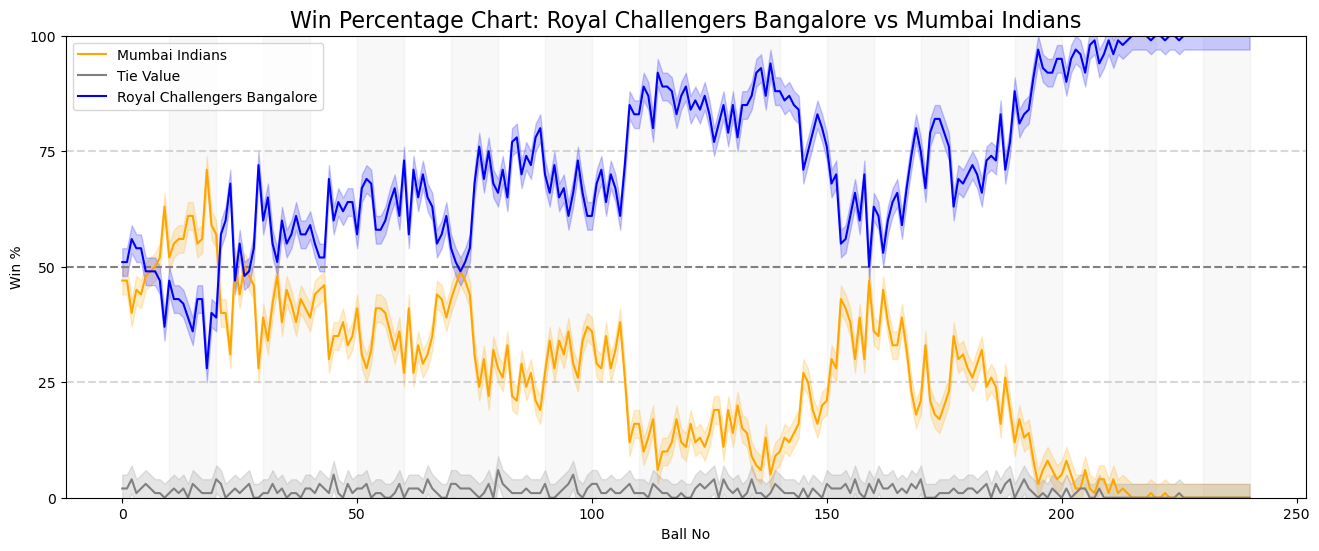

In [451]:
plt.figure(figsize = (16, 6))

x1_values = [i for i in range(len(win_count_ls))]
y1_values = win_count_ls

x2_values = [i for i in range(len(tie_count_ls))]
y2_values = tie_count_ls

x3_values = [i for i in range(len(lose_count_ls))]
y3_values = lose_count_ls

for i in range(10, len(mdf), 20):
    if i < len(mdf) - 10:
        plt.axvspan(i, i+10, ymin = 0, ymax = 100, alpha = 0.05, color='grey')
        
plt.axhline(y = 75, ls = '--', alpha = 0.3, c = 'grey')
plt.axhline(y = 50, ls = '--', alpha = 1, c = 'grey')
plt.axhline(y = 25, ls = '--', alpha = 0.3, c = 'grey')

plt.plot(x1_values, y1_values, color = 'orange', label = t2)
plt.plot(x2_values, y2_values, color = 'grey', label = 'Tie Value')
plt.plot(x3_values, y3_values, color = 'blue', label = t1)

plt.ylim(0, 100)
plt.yticks([0, 25, 50, 75, 100])


# add confidence interval
ci = 3
plt.fill_between(x1_values, np.array(y1_values) - ci, np.array(y1_values) + ci, color = 'orange', alpha = 0.2 )
plt.fill_between(x2_values, np.array(y2_values) - ci, np.array(y2_values) + ci, color = 'grey', alpha = 0.2 )
plt.fill_between(x3_values, np.array(y3_values) - ci, np.array(y3_values) + ci, color = 'blue', alpha = 0.2 )

plt.title('Win Percentage Chart: ' + t1 + ' vs ' + t2, fontsize = 16)
plt.xlabel('Ball No')
plt.ylabel('Win %')
plt.legend()
plt.show()


In [455]:
import plotly.graph_objects as go
import numpy as np

fig = go.Figure()

x1_values = [i for i in range(len(win_count_ls))]
y1_values = win_count_ls

x2_values = [i for i in range(len(tie_count_ls))]
y2_values = tie_count_ls

x3_values = [i for i in range(len(lose_count_ls))]
y3_values = lose_count_ls

for i in range(10, len(mdf), 20):
    if i < len(mdf) - 10:
        fig.add_shape(type="rect",xref="x",yref="paper",x0=i,y0=0,x1=i+10,y1=1,fillcolor="LightGray",opacity=0.2,layer="below")

fig.add_shape(type="line",x0=min(x1_values),x1=max(x1_values),
              y0=75,
              y1=75,
              line=dict(color="gray", width=1, dash="dash"),
              opacity=0.3
             )

fig.add_shape(type="line",
              x0=min(x1_values),
              x1=max(x1_values),
              y0=50,
              y1=50,
              line=dict(color="gray", width=1, dash="dash"),
              opacity=1
             )

fig.add_shape(type="line",
              x0=min(x1_values),
              x1=max(x1_values),
              y0=25,
              y1=25,
              line=dict(color="gray", width=1, dash="dash"),
              opacity=0.3
             )

fig.add_trace(go.Scatter(x=x1_values, y=y1_values, mode="lines", name=t2, line=dict(color="orange")))
fig.add_trace(go.Scatter(x=x2_values, y=y2_values, mode="lines", name="Tie Value", line=dict(color="gray")))
fig.add_trace(go.Scatter(x=x3_values, y=y3_values, mode="lines", name=t1, line=dict(color="blue")))

fig.update_layout(title="Win Percentage Chart: " + t1 + " vs " + t2,
                  xaxis_title="Ball No",
                  yaxis_title="Win %",
                  yaxis=dict(range=[0, 100], tickvals=[0, 25, 50, 75, 100]),
                  legend=dict(x=0.5, y=1.15),
                  height=500,
                  width=1000)